## 0. Goal 
Calculate spectrograms from segmented datasets. <br>
Use the function from Sainburg...Gentner, 2020

In [1]:
import os, sys, importlib, librosa, glob, h5py
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from joblib import Parallel, delayed
import random
import umap, hdbscan
from collections import Counter
import seaborn as sns
from matplotlib.colors import ListedColormap

plt.rcParams['pdf.fonttype'] = 42 

2025-06-04 10:58:25.398194: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-04 10:58:25.402173: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-04 10:58:25.412404: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749049105.428393 2532024 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749049105.433224 2532024 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1749049105.447566 2532024 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [2]:
# import my utility script
cluster_script_path = '/home/zz367/ProjectsU/EphysMONAO/Jupyter/MatlabCodes/ZZ_callClustering/'
sys.path.insert(1, cluster_script_path)
import umap_sainburg
importlib.reload(umap_sainburg)

<module 'umap_sainburg' from '/home/zz367/ProjectsU/EphysMONAO/Jupyter/MatlabCodes/ZZ_callClustering/umap_sainburg.py'>

In [3]:
# create a custom colormap for spectrogram
jet = plt.get_cmap('jet', 255)
# Extract jet colors and prepend black at the beginning
jet_colors = jet(np.linspace(0, 1, 255))
custom_colors = np.vstack([[0, 0, 0, 1], jet_colors])  # Black for 0, then jet
custom_cmap = ListedColormap(custom_colors)

## 1. Inputs

In [23]:
fd_z4 = '/mnt/z4'
fd_data = os.path.join(fd_z4, 'zz367', 'EphysMONAO', 'Analyzed', 'vaeWav')
birdIDs = ['pair5RigCCU29', 'pair4RigACU68', 'pair4RigBCU53', 'pair2RigBCU25']
# color limits when calculating spectrograms, depending on the audio amplitude, may differ between birds
clims = [[-50, 12.5], [-55, 20], [-50, 25], [-50, 20]]
# what syllable to analyze
syl = ['v']
# whether to use mel freq and time stretch
mel = True
time_stretch = True

In [24]:
# define hyperparameters
hparams = umap_sainburg.HParams(
    n_fft = 256,
    fs = 20000,
    mel = mel,
    num_mel_bins = 32,
    mel_lower_edge_hertz=250,
    mel_upper_edge_hertz=7500,
    butter_lowcut = 250,
    butter_highcut = 7500,
    ref_level_db = 20,  # this is like the high bound of clim
    min_level_db = -50,  # this is like the low bound of clim
    mask_spec = False,
    win_length_ms = 10,
    hop_length_ms = 2,
    mask_spec_kwargs = {"spec_thresh": 0.4, "offset": 1e-10},
)

In [25]:
win_ms = hparams.win_length_ms
hop_ms = hparams.hop_length_ms
print(f'Spectrogram window size (ms): {win_ms:.3f}')
print(f'Spectrogram window hop (ms): {hop_ms:.3f}')

Spectrogram window size (ms): 10.000
Spectrogram window hop (ms): 2.000


In [26]:
# calculate linear-mel frequency transformation
mel_matrix = umap_sainburg.prepare_mel_matrix(hparams, hparams.fs, return_numpy=True, GPU_backend=False)
print(mel_matrix.shape)

(129, 32)


## 2. Loop through birds, calculate spectrograms

Processing for pair5RigCCU29...
spec_sainburg_melTrue_tstretchTrue
/mnt/z4/zz367/EphysMONAO/Analyzed/vaeWav/pair5RigCCU29/Spectrogram/v/pair5RigCCU29.v.spec_sainburg_melTrue_tstretchTrue.h5
/mnt/z4/zz367/EphysMONAO/Analyzed/vaeWav/pair5RigCCU29/Spectrogram/v/pair5RigCCU29.v.spec_sainburg_melTrue_tstretchTrue.info.csv
1921
Calculate spectrograms...


[Parallel(n_jobs=48)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=48)]: Done  66 tasks      | elapsed:    0.4s
[Parallel(n_jobs=48)]: Done 288 tasks      | elapsed:    1.7s
[Parallel(n_jobs=48)]: Done 612 tasks      | elapsed:    3.6s
[Parallel(n_jobs=48)]: Done 1008 tasks      | elapsed:    5.9s
[Parallel(n_jobs=48)]: Done 1476 tasks      | elapsed:    8.5s
[Parallel(n_jobs=48)]: Done 1826 out of 1921 | elapsed:   10.6s remaining:    0.5s
[Parallel(n_jobs=48)]: Done 1921 out of 1921 | elapsed:   10.9s finished
[Parallel(n_jobs=48)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=48)]: Done  66 tasks      | elapsed:    0.0s
[Parallel(n_jobs=48)]: Done 290 tasks      | elapsed:    0.1s


23240 (23240, 5)


[Parallel(n_jobs=48)]: Done 1208 tasks      | elapsed:    0.2s
[Parallel(n_jobs=48)]: Done 5280 tasks      | elapsed:    0.5s
[Parallel(n_jobs=48)]: Done 18996 tasks      | elapsed:    1.3s
[Parallel(n_jobs=48)]: Done 21696 tasks      | elapsed:    1.5s
[Parallel(n_jobs=48)]: Done 23240 out of 23240 | elapsed:    1.6s finished
[Parallel(n_jobs=48)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=48)]: Done  67 tasks      | elapsed:    0.0s
[Parallel(n_jobs=48)]: Done 290 tasks      | elapsed:    0.1s


49


[Parallel(n_jobs=48)]: Done 1200 tasks      | elapsed:    0.2s
[Parallel(n_jobs=48)]: Done 5312 tasks      | elapsed:    0.4s
[Parallel(n_jobs=48)]: Done 18996 tasks      | elapsed:    0.8s
[Parallel(n_jobs=48)]: Done 21696 tasks      | elapsed:    1.0s
[Parallel(n_jobs=48)]: Done 23240 out of 23240 | elapsed:    1.1s finished


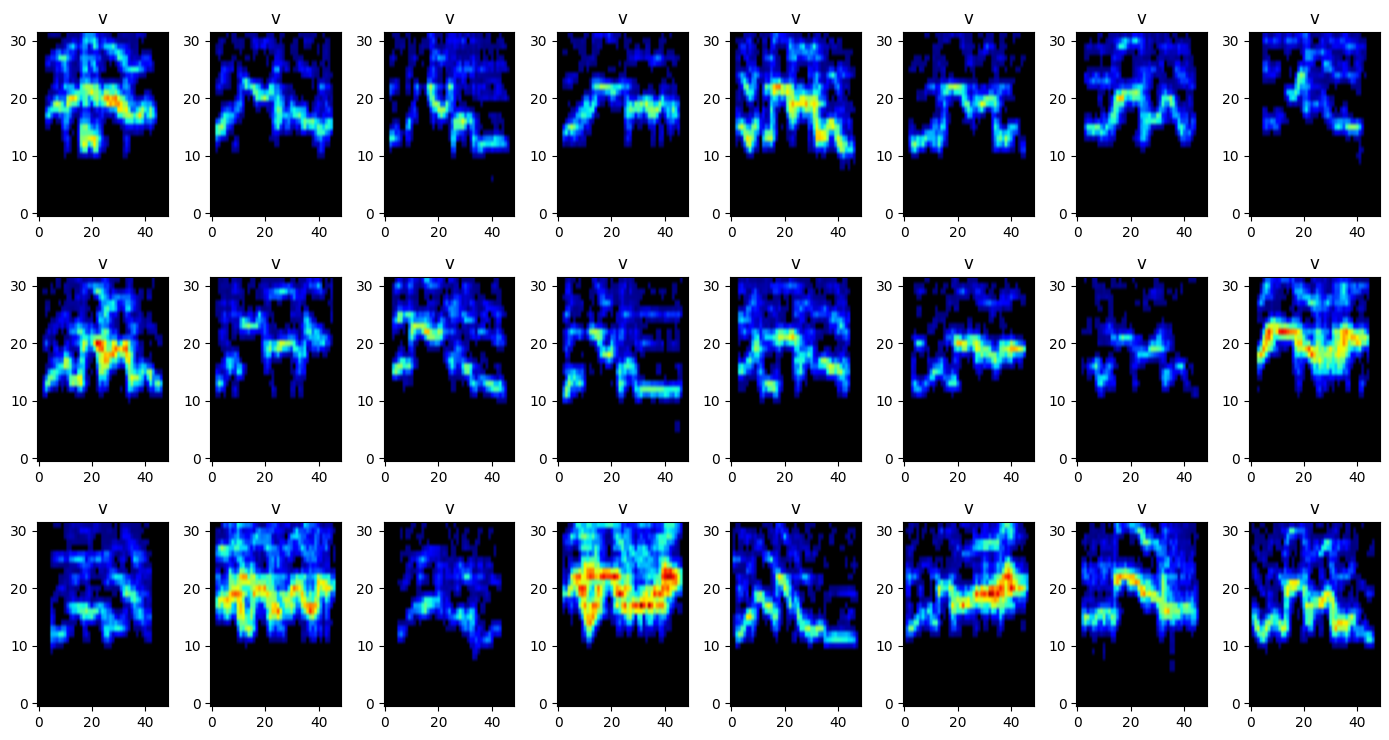

max pixel value: 0.7227714486944463
(23240, 32, 49)
Processing for pair4RigACU68...
spec_sainburg_melTrue_tstretchTrue
/mnt/z4/zz367/EphysMONAO/Analyzed/vaeWav/pair4RigACU68/Spectrogram/v/pair4RigACU68.v.spec_sainburg_melTrue_tstretchTrue.h5
/mnt/z4/zz367/EphysMONAO/Analyzed/vaeWav/pair4RigACU68/Spectrogram/v/pair4RigACU68.v.spec_sainburg_melTrue_tstretchTrue.info.csv
4100
Calculate spectrograms...


[Parallel(n_jobs=48)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=48)]: Done  66 tasks      | elapsed:    0.4s
[Parallel(n_jobs=48)]: Done 288 tasks      | elapsed:    1.5s
[Parallel(n_jobs=48)]: Done 612 tasks      | elapsed:    3.4s
[Parallel(n_jobs=48)]: Done 1008 tasks      | elapsed:    5.7s
[Parallel(n_jobs=48)]: Done 1476 tasks      | elapsed:    8.3s
[Parallel(n_jobs=48)]: Done 2016 tasks      | elapsed:   11.3s
[Parallel(n_jobs=48)]: Done 2628 tasks      | elapsed:   14.5s
[Parallel(n_jobs=48)]: Done 3312 tasks      | elapsed:   18.3s
[Parallel(n_jobs=48)]: Done 4005 out of 4100 | elapsed:   22.0s remaining:    0.5s
[Parallel(n_jobs=48)]: Done 4100 out of 4100 | elapsed:   22.4s finished
[Parallel(n_jobs=48)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=48)]: Done  66 tasks      | elapsed:    0.0s


36359 (36359, 5)


[Parallel(n_jobs=48)]: Done 290 tasks      | elapsed:    0.1s
[Parallel(n_jobs=48)]: Done 1200 tasks      | elapsed:    0.2s
[Parallel(n_jobs=48)]: Done 5280 tasks      | elapsed:    0.7s
[Parallel(n_jobs=48)]: Done 26784 tasks      | elapsed:    1.7s
[Parallel(n_jobs=48)]: Done 33264 tasks      | elapsed:    2.0s
[Parallel(n_jobs=48)]: Done 36359 out of 36359 | elapsed:    2.2s finished


50


[Parallel(n_jobs=48)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=48)]: Done  68 tasks      | elapsed:    0.0s
[Parallel(n_jobs=48)]: Done 290 tasks      | elapsed:    0.1s
[Parallel(n_jobs=48)]: Done 1208 tasks      | elapsed:    0.2s
[Parallel(n_jobs=48)]: Done 5280 tasks      | elapsed:    0.4s
[Parallel(n_jobs=48)]: Done 26784 tasks      | elapsed:    1.2s
[Parallel(n_jobs=48)]: Done 33264 tasks      | elapsed:    1.4s
[Parallel(n_jobs=48)]: Done 36359 out of 36359 | elapsed:    1.6s finished


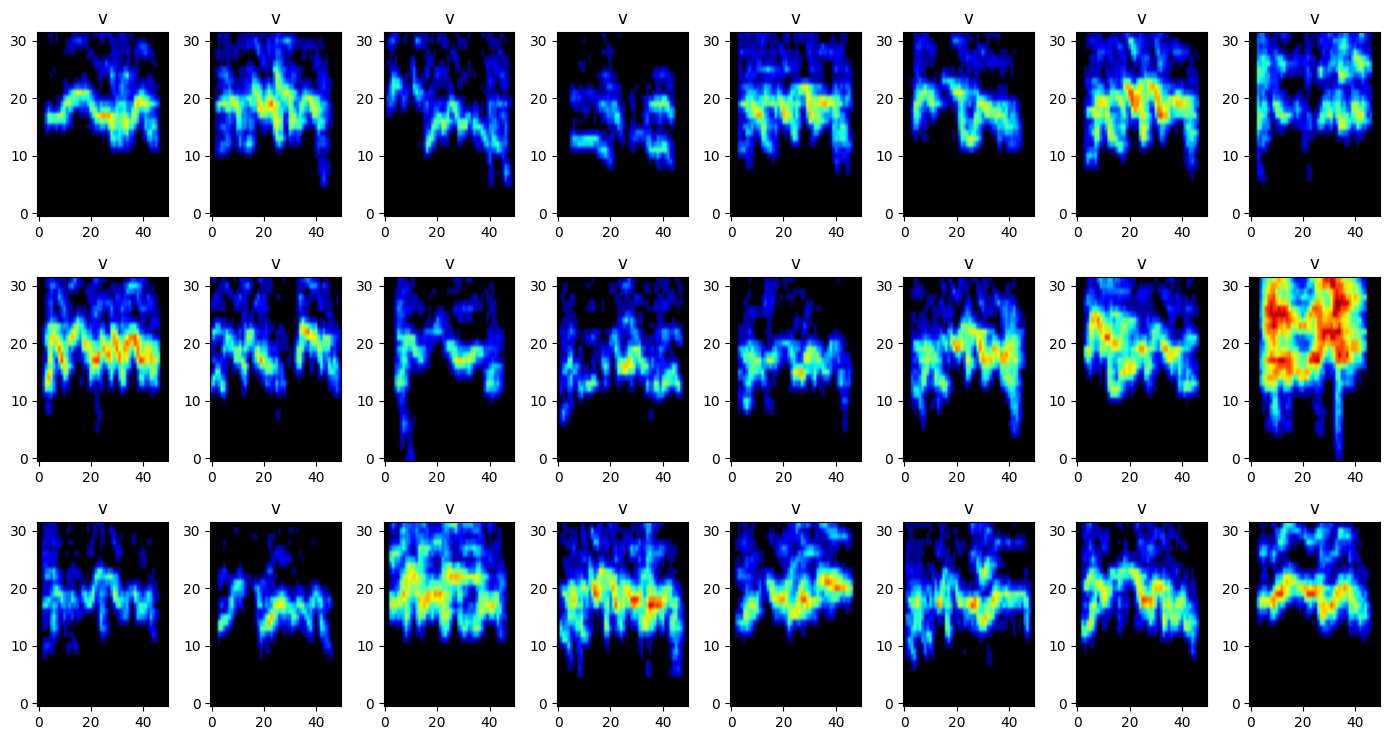

max pixel value: 0.7565887835099467
(36359, 32, 50)
Processing for pair4RigBCU53...
spec_sainburg_melTrue_tstretchTrue
/mnt/z4/zz367/EphysMONAO/Analyzed/vaeWav/pair4RigBCU53/Spectrogram/v/pair4RigBCU53.v.spec_sainburg_melTrue_tstretchTrue.h5
/mnt/z4/zz367/EphysMONAO/Analyzed/vaeWav/pair4RigBCU53/Spectrogram/v/pair4RigBCU53.v.spec_sainburg_melTrue_tstretchTrue.info.csv
1627
Calculate spectrograms...


[Parallel(n_jobs=48)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=48)]: Done  66 tasks      | elapsed:    0.4s
[Parallel(n_jobs=48)]: Done 288 tasks      | elapsed:    1.5s
[Parallel(n_jobs=48)]: Done 612 tasks      | elapsed:    3.2s
[Parallel(n_jobs=48)]: Done 1008 tasks      | elapsed:    5.3s
[Parallel(n_jobs=48)]: Done 1476 tasks      | elapsed:    7.7s
[Parallel(n_jobs=48)]: Done 1627 out of 1627 | elapsed:    8.4s finished
[Parallel(n_jobs=48)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=48)]: Done  66 tasks      | elapsed:    0.0s


10384 (10384, 5)


[Parallel(n_jobs=48)]: Done 292 tasks      | elapsed:    0.1s
[Parallel(n_jobs=48)]: Done 1200 tasks      | elapsed:    0.2s
[Parallel(n_jobs=48)]: Done 5280 tasks      | elapsed:    0.5s
[Parallel(n_jobs=48)]: Done 9444 tasks      | elapsed:    0.7s
[Parallel(n_jobs=48)]: Done 9984 tasks      | elapsed:    0.8s
[Parallel(n_jobs=48)]: Done 10384 out of 10384 | elapsed:    0.9s finished


51


[Parallel(n_jobs=48)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=48)]: Done  66 tasks      | elapsed:    0.0s
[Parallel(n_jobs=48)]: Done 294 tasks      | elapsed:    0.1s
[Parallel(n_jobs=48)]: Done 1200 tasks      | elapsed:    0.2s
[Parallel(n_jobs=48)]: Done 5312 tasks      | elapsed:    0.5s
[Parallel(n_jobs=48)]: Done 9444 tasks      | elapsed:    0.6s
[Parallel(n_jobs=48)]: Done 9984 tasks      | elapsed:    0.7s
[Parallel(n_jobs=48)]: Done 10384 out of 10384 | elapsed:    0.8s finished


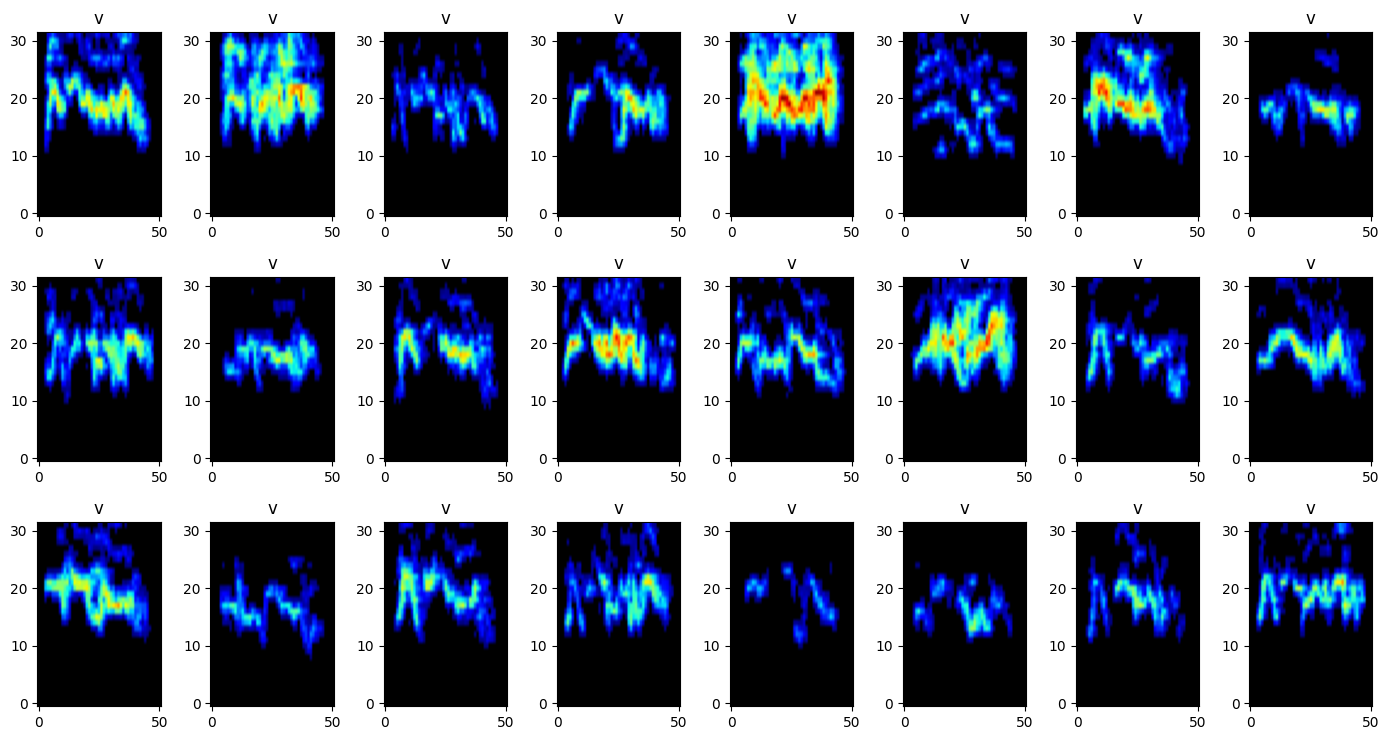

max pixel value: 0.8653683115572595
(10384, 32, 51)
Processing for pair2RigBCU25...
spec_sainburg_melTrue_tstretchTrue
/mnt/z4/zz367/EphysMONAO/Analyzed/vaeWav/pair2RigBCU25/Spectrogram/v/pair2RigBCU25.v.spec_sainburg_melTrue_tstretchTrue.h5
/mnt/z4/zz367/EphysMONAO/Analyzed/vaeWav/pair2RigBCU25/Spectrogram/v/pair2RigBCU25.v.spec_sainburg_melTrue_tstretchTrue.info.csv
436
Calculate spectrograms...


[Parallel(n_jobs=48)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=48)]: Done  66 tasks      | elapsed:    0.3s
[Parallel(n_jobs=48)]: Done 288 tasks      | elapsed:    1.6s
[Parallel(n_jobs=48)]: Done 341 out of 436 | elapsed:    1.9s remaining:    0.5s
[Parallel(n_jobs=48)]: Done 429 out of 436 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=48)]: Done 436 out of 436 | elapsed:    2.3s finished
[Parallel(n_jobs=48)]: Using backend LokyBackend with 48 concurrent workers.


3096 (3096, 5)


[Parallel(n_jobs=48)]: Done  66 tasks      | elapsed:    0.3s
[Parallel(n_jobs=48)]: Done 240 tasks      | elapsed:    0.3s
[Parallel(n_jobs=48)]: Done 868 tasks      | elapsed:    0.4s
[Parallel(n_jobs=48)]: Done 3096 out of 3096 | elapsed:    0.6s finished
[Parallel(n_jobs=48)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=48)]: Done  68 tasks      | elapsed:    0.0s
[Parallel(n_jobs=48)]: Done 288 tasks      | elapsed:    0.1s


50


[Parallel(n_jobs=48)]: Done 1200 tasks      | elapsed:    0.2s
[Parallel(n_jobs=48)]: Done 3001 out of 3096 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=48)]: Done 3096 out of 3096 | elapsed:    0.3s finished


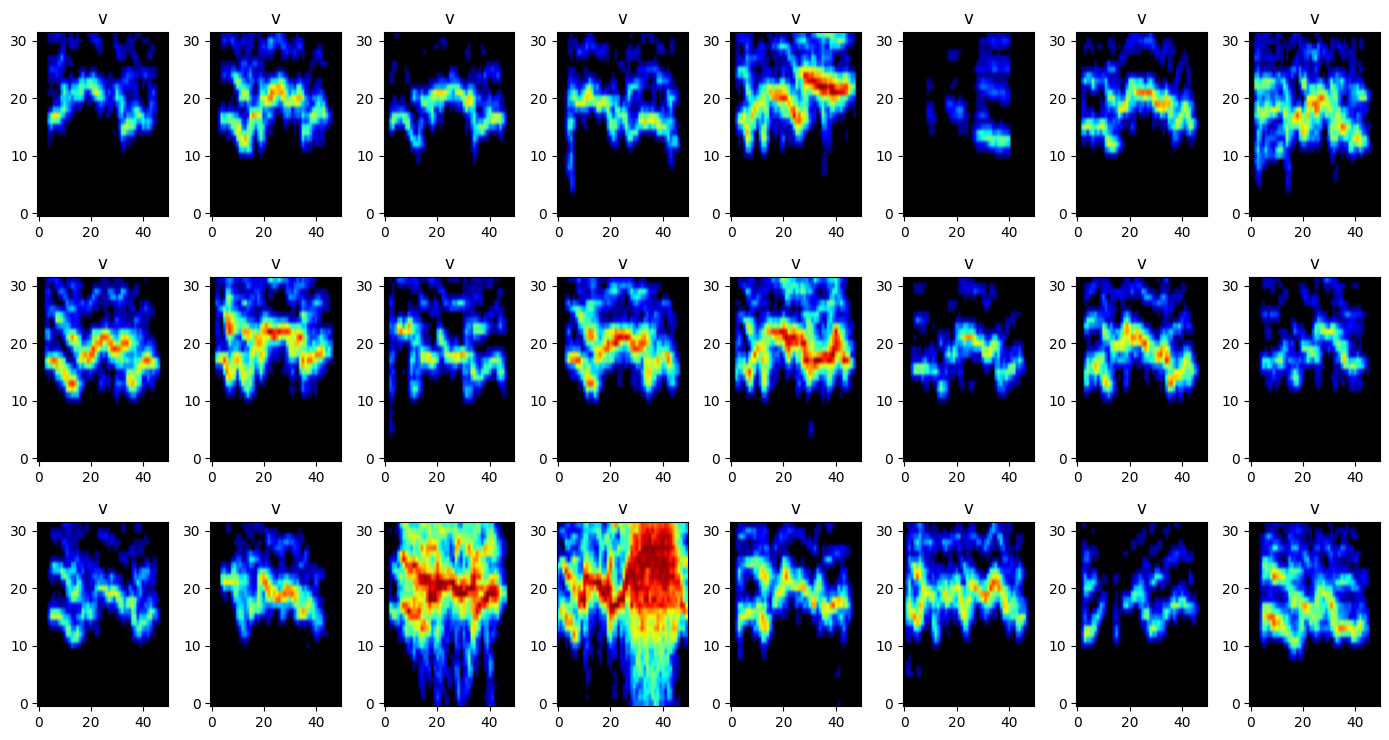

max pixel value: 0.5105266657379782
(3096, 32, 50)


In [27]:
for bi in range(len(birdIDs)):
# for bi in range(1,4):
    bd = birdIDs[bi]
    print(f'Processing for {bd}...')
    # change the color limit
    hparams.min_level_db = clims[bi][0]
    hparams.ref_level_db = clims[bi][1]

    ## given the current run a name
    run_name = f'spec_sainburg_mel{mel}_tstretch{time_stretch}'
    print(run_name)
    # save to specific folder
    temp = ''.join(syl)
    fd_save = os.path.join(fd_z4, 'zz367', 'EphysMONAO', 'Analyzed', 'vaeWav', bd, 'Spectrogram', temp)
    if not os.path.exists(fd_save):
        os.makedirs(fd_save)
    fn_h5 = os.path.join(fd_save, f'{bd}.{temp}.{run_name}.h5')
    fn_info = os.path.join(fd_save, f'{bd}.{temp}.{run_name}.info.csv')
    print(fn_h5)
    print(fn_info)

    ## grab all wav files
    fns_wav = sorted(glob.glob(os.path.join(fd_data, bd, 'Audio', '*', '*.wav')))
    fns_label = sorted(glob.glob(os.path.join(fd_data, bd, 'Audio', '*', '*.label.txt')))
    print(len(fns_wav))

    # loop through all wav files calculate spectrograms
    print('Calculate spectrograms...')
    with Parallel(n_jobs=48, verbose=5) as parallel:
        res = parallel(delayed(umap_sainburg.ZZ_specFromWav_v1)(fn, hparams, syl, mel_matrix) for fn in fns_wav)

    # flatten the parallel result
    temp = [aa[0] for aa in res]
    specs = [arr for sublist in temp if sublist for arr in sublist]
    df_list = [aa[1] for aa in res]
    info = pd.concat([df for df in df_list if not df.empty], ignore_index=True)
    print(len(specs), info.shape)

    ## stretch on the time axis if specified
    if time_stretch:
        log_scaling_factor = 10
        # loop through all specs to stretch
        with Parallel(n_jobs=48, verbose=5) as parallel:
            spec_resized = parallel(delayed(umap_sainburg.log_resize_spec)(spec, scaling_factor=log_scaling_factor) for spec in specs)
    else:
        spec_resized = specs

    ## Pad zeros to a uniform 
    #determine paded shape
    syll_lens = [np.shape(i)[1] for i in spec_resized]
    # syll_lens = [np.shape(i)[1] for i in specs]   # no stretching
    # pad_length = np.max(syll_lens)
    pad_length = int(np.quantile(syll_lens, 0.995))
    print(pad_length)

    # loop through all resized specs to pad
    with Parallel(n_jobs=48, verbose=5) as parallel:
        spec_padded = parallel(delayed(umap_sainburg.pad_spectrogramZZ)(spec, pad_length=pad_length) for spec in spec_resized)

    # plot some example spectrograms
    nrow = 3
    ncol = 8
    random.seed(1118)
    idx_rd = random.sample(range(len(spec_padded)), nrow*ncol)
    fig, axes = plt.subplots(nrow, ncol, figsize=(14, nrow*2.5))
    for ii in range(len(idx_rd)):
        plot_i = ii//ncol
        plot_j = ii%ncol
        ax = axes[plot_i][plot_j]
        ax.imshow(spec_padded[idx_rd[ii]], aspect='auto', cmap=custom_cmap, vmin=0, vmax=1, origin='lower')
        ax.set_title(info.loc[idx_rd[ii], 'label'])
    plt.tight_layout()
    plt.show()
    # save figure
    temp = ''.join(syl)
    fn_fig = os.path.join(fd_save, f'{bd}.{temp}.{run_name}.pdf')
    fig.savefig(fn_fig)
    print('max pixel value:', np.amax(specs[0]))

    ## save results
    # save padded spectrograms as h5 file 
    spec_win_all = np.stack(spec_padded, axis=0)
    print(spec_win_all.shape)
    with h5py.File(fn_h5, 'w') as f:
        f.create_dataset('spec_win_all', data=spec_win_all)

    # save meta info as well
    info.to_csv(fn_info)

In [28]:
info.head()

,fn_wav,s_idx,istart,iend,label
0,/mnt/z4/zz367/EphysMONAO/Analyzed/vaeWav/pair2...,4,94840,96540,v
1,/mnt/z4/zz367/EphysMONAO/Analyzed/vaeWav/pair2...,5,97360,100440,v
2,/mnt/z4/zz367/EphysMONAO/Analyzed/vaeWav/pair2...,6,108360,111740,v
3,/mnt/z4/zz367/EphysMONAO/Analyzed/vaeWav/pair2...,10,134600,138100,v
4,/mnt/z4/zz367/EphysMONAO/Analyzed/vaeWav/pair2...,11,148460,151200,v
